In [1]:
#csv read
import pandas as pd

prescription_df = pd.read_csv("C:\\Users\\oht31\\Desktop\\grk\\[GRK] Statistical Test Prescription Data - [GRK] Statistical Test Prescription Data.csv")
patient = pd.read_csv("C:\\Users\\oht31\\Desktop\\grk\\[GRK]Statistical Test Patient Data.csv")

In [3]:
print(prescription_df)
print(patient)

        Anonymous_id prsc_inflow department_code department_name  \
0         9117268659          외래             OPH              안과   
1         9117268659          외래             OPH              안과   
2         9117268659          외래             OPH              안과   
3         9117268659          외래             OPH              안과   
4         9117315706          외래             OPH              안과   
...              ...         ...             ...             ...   
340626    9119139102          응급             ONC            종양내과   
340627    9119139102          응급             ONC            종양내과   
340628    9119139102          응급             ONC            종양내과   
340629    9119139102          응급             ONC            종양내과   
340630    9119147071          외래              ST           위장관외과   

       prescription_department prescription_dep_name action_code  \
0                          OPH                    안과       당뇨병센터   
1                          OPH                 

In [4]:
#환자 데이터 정보 딕셔너리로 저장_추후 군집 데이터와 합치기 용이하도록
data_dict = {}
for index, row in patient.iterrows():
    anonymous_id = row["Anonymous_id"]
    if anonymous_id not in data_dict:
        data_dict[anonymous_id] = []
    data_dict[anonymous_id].append({
        "sex": row["sex"],
        "age": row["age"],
        "city": row["city"],
        "cancer_type": row["cancer_type"],
        "appointment_type": row["appointment_type"],
        "patient_type": row["patient_type"],
        "inflow": row["inflow"]
    })

print(data_dict)


{9117538510: [{'sex': '여성', 'age': 82, 'city': '경상북도', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '과초'}], 9119012769: [{'sex': '여성', 'age': 76, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '원무(창구)', 'patient_type': '외래', 'inflow': '과초'}], 9118054677: [{'sex': '남성', 'age': 75, 'city': '경기도', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '의사초진'}], 9117469764: [{'sex': '남성', 'age': 77, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '신환'}], 9117470235: [{'sex': '남성', 'age': 78, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '병동(퇴원)', 'patient_type': '입원', 'inflow': '재진'}], 9117459302: [{'sex': '여성', 'age': 66, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '원무(창구)', 'patient_type': '입원', 'inflow': '의사초진'}], 9118791205: [{'sex': '남성', 'age': 83, 'city': '경상북도', 'cancer_type': '담췌암', 'appointment_type': '병동(퇴원)', 'patient_type

In [5]:
#처방 시간을 시간 데이터로 변경 및 환자 코드 별로 데이터 정리
prescription_df['prescription_datetime'] = pd.to_datetime(prescription_df['prescription_datetime'])

prescription_df = prescription_df.sort_values(by=['Anonymous_id', 'prescription_datetime'])

# 처방시간 간의 차이 계산
prescription_df['date_diff'] = prescription_df.groupby('Anonymous_id')['prescription_datetime'].diff().dt.days.fillna(0).astype(int)

# 결과 출력
print(prescription_df)
prescription_df.to_excel("C:\\Users\\oht31\\Desktop\\grk\\prescription_df.xlsx")

        Anonymous_id prsc_inflow department_code department_name  \
308501    9117236084          외래              GI           소화기내과   
311750    9117236084          입원              GI           소화기내과   
311755    9117236084          입원              GI           소화기내과   
311760    9117236084          입원              GI           소화기내과   
311727    9117236084          입원              GI           소화기내과   
...              ...         ...             ...             ...   
212804    9119159754          외래              BR            유방외과   
212805    9119159754          외래              BR            유방외과   
212806    9119159754          외래              BR            유방외과   
212807    9119159754          외래              BR            유방외과   
303298    9119159754          외래              BR            유방외과   

       prescription_department prescription_dep_name action_code  \
308501                      GI                 소화기내과        영상판독   
311750                      GI                 

In [6]:
#처방시간차이(date_diff)가 180일(6개월)이상 차이나는 데이터 삭제 하는 함수
def drop_outdated_data(df, threshold):
    """
    date_diff가 threshold 이상인 데이터를 삭제하는 함수.
    :param df: 데이터프레임
    :param threshold: date_diff가 threshold 이상인 값을 가진 데이터를 삭제
    :return: 필터링된 데이터프레임
    """
    return df[df['date_diff'] < threshold]

#처방 시간 사이를 반복적으로 계산하여 180일 미만으로 차이가 나는 데이터만 남기도록 하는 함수
def drop_outdated_data_iteratively(df, threshold):
    """
    주어진 데이터프레임에서 date_diff가 threshold 이상인 데이터를 반복적으로 필터링하여 삭제하는 함수.
    date_diff를 다시 계산하고, threshold 이상인 값이 없을 때까지 반복 수행함.
    
    :param df: 데이터프레임
    :param threshold: date_diff가 threshold 이상인 값을 가진 데이터를 삭제
    :return: 필터링된 데이터프레임
    """
    while True:
        df_filtered = drop_outdated_data(df, threshold)
        
        
        df_filtered['date_diff'] = df_filtered.groupby('Anonymous_id')['prescription_datetime'].diff().dt.days.fillna(0).astype(int)
        
        # threshold 이상인 값이 없으면 반복 종료
        if not (df_filtered['date_diff'] >= threshold).any():
            break
        
        
        df = df_filtered.copy()
    
    return df_filtered


final_filtered_df = drop_outdated_data_iteratively(prescription_df, 180)

# 결과 출력
print(final_filtered_df)


C:\Users\oht31\AppData\Local\Temp\ipykernel_11936\469247117.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_diff'] = df_filtered.groupby('Anonymous_id')['prescription_datetime'].diff().dt.days.fillna(0).astype(int)
C:\Users\oht31\AppData\Local\Temp\ipykernel_11936\469247117.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_diff'] = df_filtered.groupby('Anonymous_id')['prescription_datetime'].diff().dt.days.fillna(0).astype(int)
C:\Users\oht31\AppData\Local\Temp\ip

        Anonymous_id prsc_inflow department_code department_name  \
308501    9117236084          외래              GI           소화기내과   
311750    9117236084          입원              GI           소화기내과   
311755    9117236084          입원              GI           소화기내과   
311760    9117236084          입원              GI           소화기내과   
311727    9117236084          입원              GI           소화기내과   
...              ...         ...             ...             ...   
192903    9119159754          입원              BR            유방외과   
212804    9119159754          외래              BR            유방외과   
212805    9119159754          외래              BR            유방외과   
212806    9119159754          외래              BR            유방외과   
212807    9119159754          외래              BR            유방외과   

       prescription_department prescription_dep_name action_code  \
308501                      GI                 소화기내과        영상판독   
311750                      GI                 

C:\Users\oht31\AppData\Local\Temp\ipykernel_11936\469247117.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_diff'] = df_filtered.groupby('Anonymous_id')['prescription_datetime'].diff().dt.days.fillna(0).astype(int)


In [6]:
final_filtered_df.to_excel("C:\\Users\\oht31\\Desktop\\grk\\filter_df.xlsx")

In [10]:
##평균과 빈도에 대한 데이터 프레임 생성

# Anonymous_id 별로 date_diff의 평균 계산
avg_date_diff = final_filtered_df.groupby('Anonymous_id')['date_diff'].mean()

# Anonymous_id 별로 prescription_datetime의 빈도 계산
prescription_datetime_frequency = final_filtered_df.groupby('Anonymous_id')['prescription_datetime'].count()


print("Anonymous_id 별 date_diff의 평균:")
print(avg_date_diff)

print("\nAnonymous_id 별 prescription_datetime의 빈도:")
print(prescription_datetime_frequency)

# 두 개의 데이터프레임을 'Anonymous_id'를 기준으로 병합
merged_df = pd.merge(avg_date_diff, prescription_datetime_frequency, on='Anonymous_id')


result_df = pd.concat([merged_df['date_diff'], merged_df['prescription_datetime']], axis=1)
result_df.columns = ['avg_date_diff', 'prescription_datetime_frequency']

# 결과 출력
print(result_df)



Anonymous_id 별 date_diff의 평균:
Anonymous_id
9117236084     0.280769
9117236811     0.000000
9117237151     0.000000
9117238477    12.541284
9117238527     2.044118
                ...    
9119157336     0.000000
9119157861     0.207547
9119158484     0.398438
9119159564     4.500000
9119159754     2.516129
Name: date_diff, Length: 1481, dtype: float64

Anonymous_id 별 prescription_datetime의 빈도:
Anonymous_id
9117236084    260
9117236811      4
9117237151      7
9117238477    109
9117238527     68
             ... 
9119157336      6
9119157861    149
9119158484    384
9119159564      2
9119159754     62
Name: prescription_datetime, Length: 1481, dtype: int64
              avg_date_diff  prescription_datetime_frequency
Anonymous_id                                                
9117236084         0.280769                              260
9117236811         0.000000                                4
9117237151         0.000000                                7
9117238477        12.541284     

In [8]:
result_df

,avg_date_diff,prescription_datetime_frequency
Anonymous_id,,
9117236084,0.280769,260
9117236811,0.000000,4
9117237151,0.000000,7
9117238477,12.541284,109
9117238527,2.044118,68
...,...,...
9119157336,0.000000,6
9119157861,0.207547,149
9119158484,0.398438,384


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

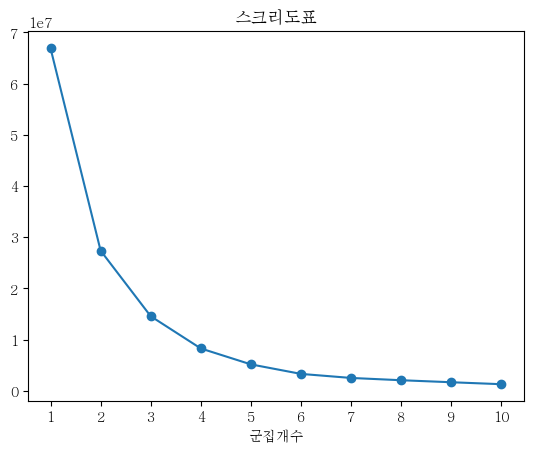

In [11]:
#군집 분석을 위한 스크리도표

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

plt.rcParams['font.family'] = 'Batang'
plt.rcParams['axes.unicode_minus'] =False
# 검증할 군집 수의 범위
num_clusters_range = range(1, 11)

X = result_df[['avg_date_diff', 'prescription_datetime_frequency']]
# 클러스터 내 분산 저장할 리스트
inertia_values = []

# 각 군집 수에 대해 K-means 모델을 학습하고 클러스터 내 분산을 저장
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=50)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 스크리 도표 그리기
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('스크리도표')
plt.xlabel('군집개수')
plt.ylabel('')
plt.xticks(np.arange(min(num_clusters_range), max(num_clusters_range)+1, 1))
plt.show()


In [25]:

# 군집의 수_스크리도표상 기울기의 변화가 완만해지는 3~5 사이로 군집 개수 설정
num_clusters = 3

# K-means 모델 초기화
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 데이터 준비 (result_df에서 필요한 데이터 추출)
X = result_df[['avg_date_diff', 'prescription_datetime_frequency']]

# 모델 학습
kmeans.fit(X)

# 각 데이터 포인트가 속한 군집 확인
clusters = kmeans.predict(X)

# 군집 결과를 result_df에 추가
result_df['cluster'] = clusters+1

# 결과 출력
print(result_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              avg_date_diff  prescription_datetime_frequency  cluster
Anonymous_id                                                         
9117236084         0.280769                              260        2
9117236811         0.000000                                4        1
9117237151         0.000000                                7        1
9117238477        12.541284                              109        1
9117238527         2.044118                               68        1
...                     ...                              ...      ...
9119157336         0.000000                                6        1
9119157861         0.207547                              149        1
9119158484         0.398438                              384        2
9119159564         4.500000                                2        1
9119159754         2.516129                               62        1

[1481 rows x 3 columns]


In [11]:
result_df.to_excel("C:\\Users\\oht31\\Desktop\\grk\\cluster_df.xlsx")

In [14]:
#action_code에 있는 (self), General 등 문제 기준에 알맞게 정리하기 위한 확인
final_filtered_df['action_code'].unique()

array(['영상판독', 'General', '진단검사의학과', '심전도실', '촬영실', '핵의학', '병리과', '조영실',
       '소화내시경', '정형외과검사실', '성형외과', '안과(Self)', '치과', '재활의학과', '산부인과왜래 검사',
       '마취통증의학과', '중환자실', '기관지내시경', '비뇨기과외래', '응급의료센터', '안과검사실', '영양팀',
       '정신건강의학과', '이비인후과(Self)', '당뇨병센터', '호흡기검사실', '혈관검사', '이비인후과검사실',
       '비뇨기검사실', '신경과(Self)', '신경과근전도검사실', '뇌파검사실', '피부과', '대장항문클리닉',
       '임상연구검사실', '감마나이프센터', '가정간호', '노년내과(Self)', '신경과인지신경학실', '운동부하검사실',
       '전기생리학검사실', '통증클리닉', '비뇨기과수술장', '체외수정실', '산부인과병동', '심장내과검사실',
       '홀터검사실', '천식알레르기검사실', '신경비상팀(NET)', '뇌유발전위검사실', '류마티스검사실',
       '건강증진센터', '임상시험센터', '임상연구병동', '혈액치료실', '의학유전학센터검사실', '뇌신경검사실혈류검사실',
       '외래주사실', '수면다원검사실', '산부인과외래 진료', '가정의학과외래'], dtype=object)

In [15]:
final_filtered_df = final_filtered_df.applymap(lambda x: x.replace('(Self)', '') if isinstance(x, str) else x)

In [16]:
general_indices = final_filtered_df[final_filtered_df['action_code'] == 'General'].index

# 'action_code' 열이 'General'인 행의 'patient_location' 값을 해당 행의 'action_code'에 대입하여 치환
for idx in general_indices:
    final_filtered_df.at[idx, 'action_code'] = final_filtered_df.at[idx, 'patient_location']

In [17]:
#000병동의 숫자 제거
import re
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

final_filtered_df['action_code'] = final_filtered_df['action_code'].apply(remove_numbers)

In [18]:
total_count = len(final_filtered_df['action_code'])

# action_code 열에 있는 데이터의 빈도 수 파악
action_code_counts = final_filtered_df['action_code'].value_counts()

# 각 데이터의 비율 계산
action_code_ratios = action_code_counts / total_count

print("Action Code의 전체 데이터 대비 비율:")
print(action_code_ratios)

Action Code의 전체 데이터 대비 비율:
진단검사의학과    0.507011
병동         0.288945
촬영실        0.053795
핵의학        0.027573
병리과        0.018142
             ...   
건강증진센터     0.000004
혈액내과 외래    0.000004
수면다원검사실    0.000004
건강의학과      0.000004
가정의학과외래    0.000004
Name: action_code, Length: 122, dtype: float64


In [19]:
action_code_ratios = action_code_counts.head(15) / total_count

# 상위 15개 데이터까지의 누적 비율 계산
cumulative_ratios = action_code_ratios.cumsum()

print("Action Code의 상위 15개 데이터 누적 비율:")
print(cumulative_ratios)

Action Code의 상위 15개 데이터 누적 비율:
진단검사의학과    0.507011
병동         0.795956
촬영실        0.849751
핵의학        0.877323
병리과        0.895465
외과계중환자실    0.905741
응급실        0.914547
안과         0.922226
내과계중환자실    0.928650
마취통증의학과    0.934216
심전도실       0.939496
신경과중환자실    0.944531
소화내시경      0.949527
호흡기검사실     0.953246
종양내과 외래    0.956348
Name: action_code, dtype: float64


In [20]:
top_15_action_codes = action_code_counts.head(15).index

# 빈도 상위 15개 데이터를 제외한 나머지 데이터를 '기타'로 변경
final_filtered_df.loc[~final_filtered_df['action_code'].isin(top_15_action_codes), 'action_code'] = '기타'

print(final_filtered_df)
# final_filtered_df.to_excel("C:\\Users\\oht31\\Desktop\\grk\\result_df.xlsx")

        Anonymous_id prsc_inflow department_code department_name  \
308501    9117236084          외래              GI           소화기내과   
311750    9117236084          입원              GI           소화기내과   
311755    9117236084          입원              GI           소화기내과   
311760    9117236084          입원              GI           소화기내과   
311727    9117236084          입원              GI           소화기내과   
...              ...         ...             ...             ...   
192903    9119159754          입원              BR            유방외과   
212804    9119159754          외래              BR            유방외과   
212805    9119159754          외래              BR            유방외과   
212806    9119159754          외래              BR            유방외과   
212807    9119159754          외래              BR            유방외과   

       prescription_department prescription_dep_name action_code  \
308501                      GI                 소화기내과          기타   
311750                      GI                 

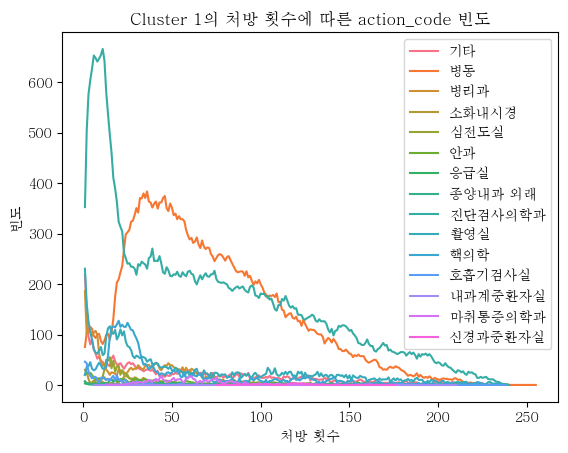

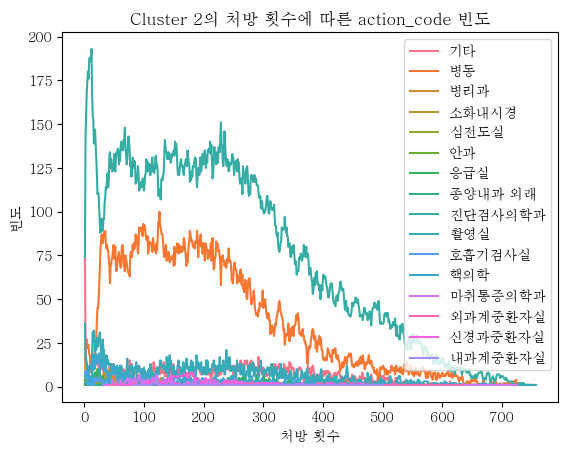

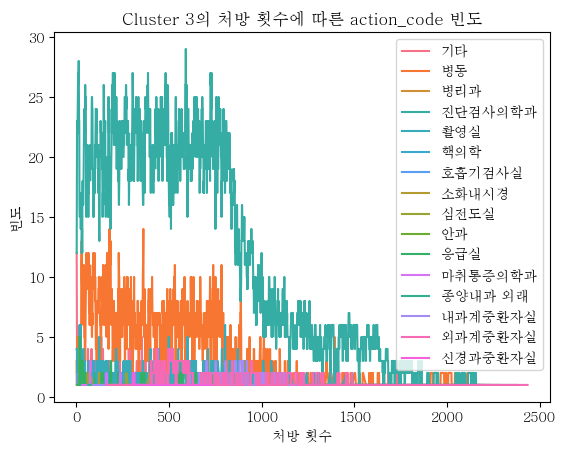

In [26]:
#군집별 처방시기에 따른 그래프
import seaborn as sns

# 시각화에 사용할 색상 팔레트 지정
palette = sns.color_palette("husl", 16)

# result_df에 군집 번호를 기준으로 final_filtered_df에 군집 추가
final_filtered_df['Cluster'] = result_df['cluster']


final_filtered_df['prescription_datetime'] = pd.to_datetime(final_filtered_df['prescription_datetime'])
final_filtered_df = final_filtered_df.sort_values(by=['Anonymous_id', 'prescription_datetime'])

# prescription_datetime을 기준으로 진단 횟수를 카운트하여 새로운 컬럼 추가
final_filtered_df['diagnosis_count'] = final_filtered_df.groupby('Anonymous_id').cumcount() + 1

# 군집별로 진단 순서에 따른 action_code의 빈도 계산
action_code_freq = final_filtered_df.groupby(['Cluster', 'diagnosis_count', 'action_code']).size().reset_index(name='frequency')

# final_filtered_df와 result_df를 합침
merged_df = pd.merge(final_filtered_df, result_df, left_on='Anonymous_id', right_index=True)

# 군집별로 진단 순서에 따른 action_code의 빈도 계산
action_code_freq = merged_df.groupby(['cluster', 'diagnosis_count', 'action_code']).size().reset_index(name='frequency')

# 각 클러스터별로 action_code의 순서를 유지할 리스트 생성
cluster_action_code_order = {}

# 각 클러스터에 대해 action_code의 순서 결정
for cluster_num in action_code_freq['cluster'].unique():
    cluster_data = action_code_freq[action_code_freq['cluster'] == cluster_num]
    action_codes = cluster_data['action_code'].unique()
    cluster_action_code_order[cluster_num] = action_codes

# 모든 군집에서 동일한 색상을 사용하기 위해 색상 팔레트 인덱스 고정
fixed_palette_index = {}

# 각 action_code에 대해 동일한 색상을 할당
for action_code in action_code_freq['action_code'].unique():
    fixed_palette_index[action_code] = palette[action_code_freq['action_code'].unique().tolist().index(action_code)]


for cluster_num in action_code_freq['cluster'].unique():
    cluster_data = action_code_freq[action_code_freq['cluster'] == cluster_num]
    plt.figure()
    for i, action_code in enumerate(cluster_action_code_order[cluster_num]):
        action_data = cluster_data[cluster_data['action_code'] == action_code]
        plt.plot(action_data['diagnosis_count'], action_data['frequency'], label=action_code, color=fixed_palette_index[action_code])
    plt.title(f'Cluster {cluster_num}의 처방 횟수에 따른 action_code 빈도')
    plt.xlabel('처방 횟수')
    plt.ylabel('빈도')
    plt.legend()
    plt.show()


In [23]:
merged_df.to_excel("C:\\Users\\oht31\\Desktop\\grk\\merger_result.xlsx")

In [27]:
result_df

,avg_date_diff,prescription_datetime_frequency,cluster
Anonymous_id,,,
9117236084,0.280769,260,2
9117236811,0.000000,4,1
9117237151,0.000000,7,1
9117238477,12.541284,109,1
9117238527,2.044118,68,1
...,...,...,...
9119157336,0.000000,6,1
9119157861,0.207547,149,1
9119158484,0.398438,384,2


In [28]:
# 군집별 평균 계산
cluster_means = result_df.groupby('cluster').agg({'avg_date_diff': 'mean', 'prescription_datetime_frequency': 'mean'})


print(cluster_means)


         avg_date_diff  prescription_datetime_frequency
cluster                                                
1             2.657240                        79.929519
2             0.966564                       400.173554
3             0.409058                      1124.333333


In [29]:
#환자 데이터 딕셔너리에 군집 데이터를 넣기 위한 군집 데이터 딕셔너리화

cluster_info = result_df['cluster'].to_dict()


for anonymous_id, data_list in data_dict.items():
    for data in data_list:
        data['cluster'] = cluster_info.get(anonymous_id, None)


print(data_dict)



{9117538510: [{'sex': '여성', 'age': 82, 'city': '경상북도', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '과초', 'cluster': 1}], 9119012769: [{'sex': '여성', 'age': 76, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '원무(창구)', 'patient_type': '외래', 'inflow': '과초', 'cluster': 1}], 9118054677: [{'sex': '남성', 'age': 75, 'city': '경기도', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '의사초진', 'cluster': 1}], 9117469764: [{'sex': '남성', 'age': 77, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '전화예약실', 'patient_type': '외래', 'inflow': '신환', 'cluster': 2}], 9117470235: [{'sex': '남성', 'age': 78, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '병동(퇴원)', 'patient_type': '입원', 'inflow': '재진', 'cluster': 1}], 9117459302: [{'sex': '여성', 'age': 66, 'city': '서울특별시', 'cancer_type': '담췌암', 'appointment_type': '원무(창구)', 'patient_type': '입원', 'inflow': '의사초진', 'cluster': 2}], 9118791205: [{'sex': '남성', 'age': 8

In [30]:
from collections import defaultdict


cluster_statistics = defaultdict(lambda: {'age_sum': 0, 'count': 0, 'city_freq': defaultdict(int), 'cancer_type_freq': defaultdict(int), 'appointment_type_freq': defaultdict(int), 'patient_type_freq': defaultdict(int), 'inflow_freq': defaultdict(int)})


for anonymous_id, data_list in data_dict.items():
    for data in data_list:
        cluster = data['cluster']
        if cluster is not None:
            
            cluster_statistics[cluster]['age_sum'] += data['age']
            cluster_statistics[cluster]['count'] += 1
            cluster_statistics[cluster]['city_freq'][data['city']] += 1
            cluster_statistics[cluster]['cancer_type_freq'][data['cancer_type']] += 1
            cluster_statistics[cluster]['appointment_type_freq'][data['appointment_type']] += 1
            cluster_statistics[cluster]['patient_type_freq'][data['patient_type']] += 1
            cluster_statistics[cluster]['inflow_freq'][data['inflow']] += 1

#군집별 연령 평균, 암, 도시, 예약, inflow 빈도 계산
for cluster, stats in cluster_statistics.items():
    if stats['count'] > 0:
        age_mean = stats['age_sum'] / stats['count']
        city_freq = stats['city_freq']
        cancer_type_freq = stats['cancer_type_freq']
        appointment_type_freq = stats['appointment_type_freq']
        patient_type_freq = stats['patient_type_freq']
        inflow_freq = stats['inflow_freq']
        print(f"Cluster {cluster}:")
        print(f" - Average Age: {age_mean:.2f}")
        print(" - City Frequency:", city_freq)
        print(" - Cancer Type Frequency:", cancer_type_freq)
        print(" - Appointment Type Frequency:", appointment_type_freq)
        print(" - Patient Type Frequency:", patient_type_freq)
        print(" - Inflow Frequency:", inflow_freq)
        print()


Cluster 1:
 - Average Age: 65.09
 - City Frequency: defaultdict(<class 'int'>, {'경상북도': 21, '서울특별시': 631, '경기도': 357, '전라남도': 17, '경상남도': 9, '인천광역시': 15, '부산광역시': 7, '강원도': 33, '전라북도': 17, '충청북도': 45, '광주광역시': 7, '대전광역시': 11, '제주특별자치도': 3, '충청남도': 22, '울산광역시': 3, '주소불명': 1, '종특별자치시': 1, '대구광역시': 5, '강원특별자치도': 1})
 - Cancer Type Frequency: defaultdict(<class 'int'>, {'담췌암': 163, '대장직장암': 251, '위암': 272, '유방암': 286, '폐암': 234})
 - Appointment Type Frequency: defaultdict(<class 'int'>, {'전화예약실': 262, '원무(창구)': 343, '병동(퇴원)': 136, '외래(진료과)': 171, '인터넷': 35, 'GHE': 13, 'ARC': 215, '진료상담': 12, '암통합진료센터': 15, '응급실': 2, 'm-PHR': 1, '의전실(비서)': 1})
 - Patient Type Frequency: defaultdict(<class 'int'>, {'외래': 810, '입원': 384, '응급': 11, '건진': 1})
 - Inflow Frequency: defaultdict(<class 'int'>, {'과초': 582, '의사초진': 176, '재진': 384, '신환': 64})

Cluster 2:
 - Average Age: 68.00
 - City Frequency: defaultdict(<class 'int'>, {'서울특별시': 125, '경기도': 62, '경상남도': 5, '광주광역시': 4, '전라북도': 3, '인천광역시': 2, '강원도': 6,

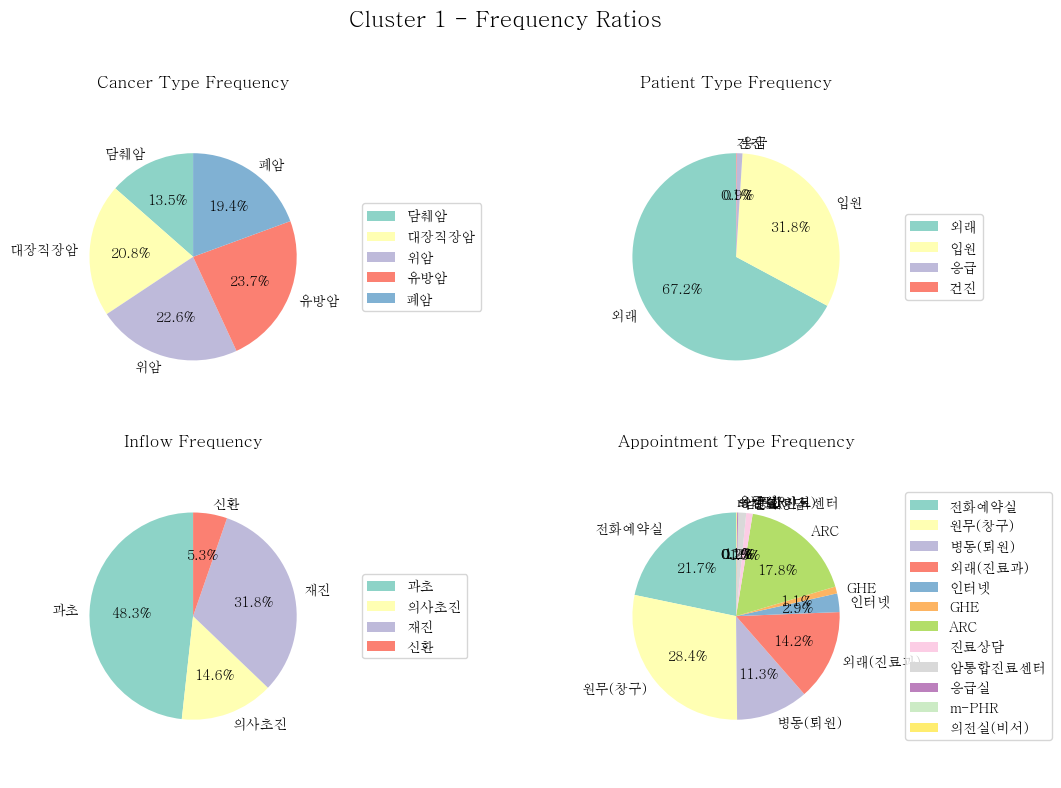

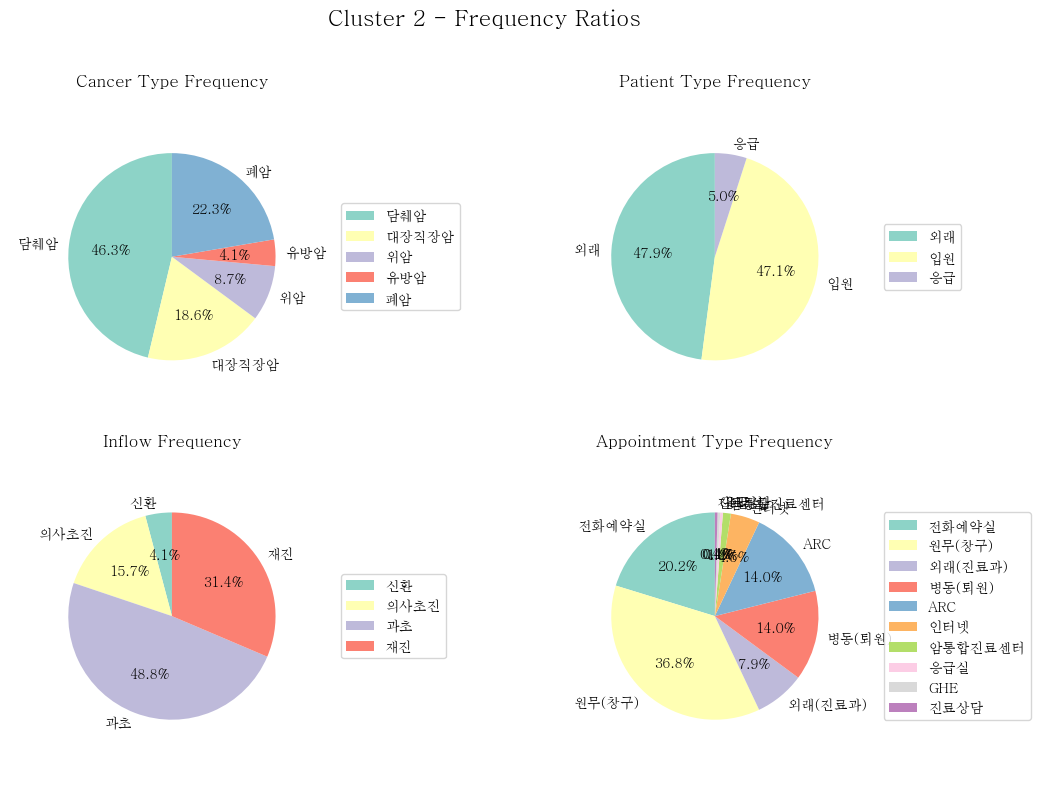

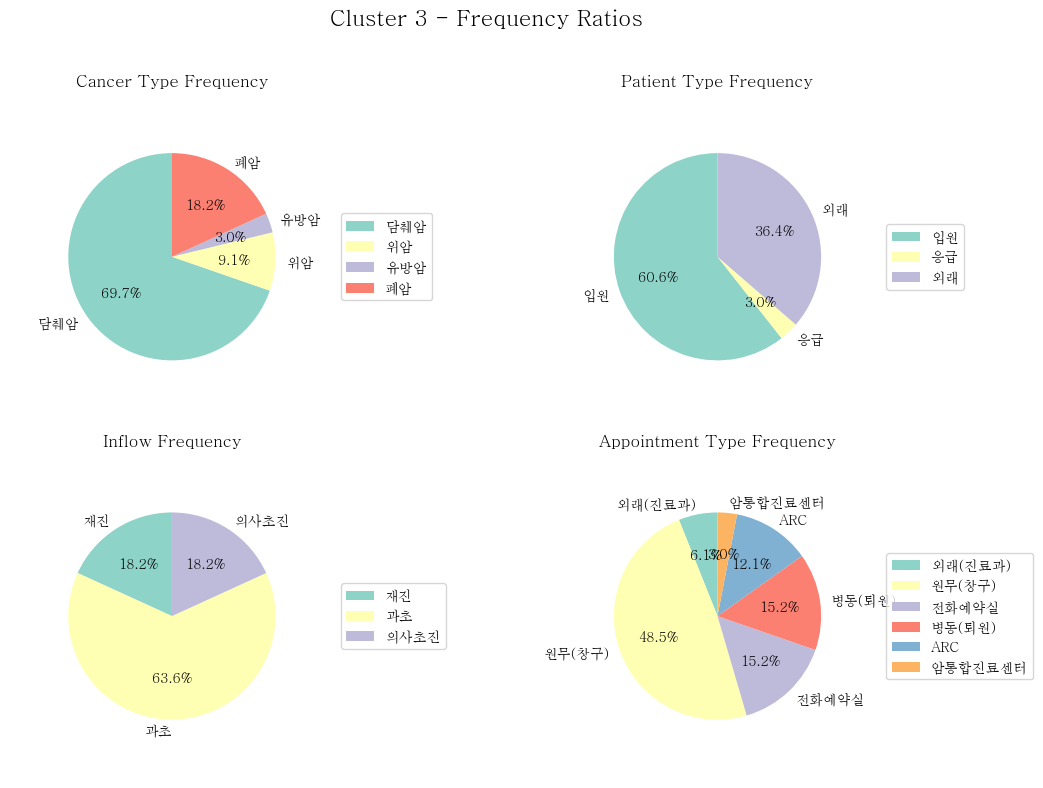

In [34]:
#군집별 빈도 그래프 작성


for cluster, stats in cluster_statistics.items():
    total_count = stats['count']
    if total_count > 0:
        cancer_type_freq = stats['cancer_type_freq']
        appointment_type_freq = stats['appointment_type_freq']
        patient_type_freq = stats['patient_type_freq']
        inflow_freq = stats['inflow_freq']
        
        
        plt.figure(figsize=(12, 8))
        
        
        colors = plt.cm.Set3.colors  # 원하는 색상 맵 선택
        
        # Cancer Type Frequency 파이 그래프
        plt.subplot(2, 2, 1)
        plt.pie(cancer_type_freq.values(), labels=cancer_type_freq.keys(), autopct='%1.1f%%', startangle=90, radius=0.8, colors=colors)
        plt.title('Cancer Type Frequency')
        plt.legend(cancer_type_freq.keys(), loc="center left", bbox_to_anchor=(1, 0.5))
        
        # Patient Type Frequency 파이 그래프
        plt.subplot(2, 2, 2)
        plt.pie(patient_type_freq.values(), labels=patient_type_freq.keys(), autopct='%1.1f%%', startangle=90, radius=0.8, colors=colors)
        plt.title('Patient Type Frequency')
        plt.legend(patient_type_freq.keys(), loc="center left", bbox_to_anchor=(1, 0.5))
        
        # Inflow Frequency 파이 그래프
        plt.subplot(2, 2, 3)
        plt.pie(inflow_freq.values(), labels=inflow_freq.keys(), autopct='%1.1f%%', startangle=90, radius=0.8, colors=colors)
        plt.title('Inflow Frequency')
        plt.legend(inflow_freq.keys(), loc="center left", bbox_to_anchor=(1, 0.5))
        
        # Appointment Type Frequency 파이 그래프
        plt.subplot(2, 2, 4)
        plt.pie(appointment_type_freq.values(), labels=appointment_type_freq.keys(), autopct='%1.1f%%', startangle=90, radius=0.8, colors=colors)
        plt.title('Appointment Type Frequency')
        plt.legend(appointment_type_freq.keys(), loc="center left", bbox_to_anchor=(1, 0.5))
        
        plt.suptitle(f"Cluster {cluster} - Frequency Ratios", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        
        plt.show()


In [35]:
# 군집별 딕셔너리 데이터 프레임화


cluster_data = []


for cluster, stats in cluster_statistics.items():
    if stats['count'] > 0:
        age_mean = stats['age_sum'] / stats['count']
        city_freq = stats['city_freq']
        cancer_type_freq = stats['cancer_type_freq']
        appointment_type_freq = stats['appointment_type_freq']
        patient_type_freq = stats['patient_type_freq']
        inflow_freq = stats['inflow_freq']
        
        
        city_freq_list = [f"{city}: {freq}" for city, freq in city_freq.items()]
        cancer_type_freq_list = [f"{cancer_type}: {freq}" for cancer_type, freq in cancer_type_freq.items()]
        appointment_type_freq_list = [f"{appointment_type}: {freq}" for appointment_type, freq in appointment_type_freq.items()]
        patient_type_freq_list = [f"{patient_type}: {freq}" for patient_type, freq in patient_type_freq.items()]
        inflow_freq_list = [f"{inflow}: {freq}" for inflow, freq in inflow_freq.items()]
        
        
        cluster_data.append({
            'Cluster': cluster,
            'Average Age': age_mean,
            'City Frequency': ', '.join(city_freq_list),
            'Cancer Type Frequency': ', '.join(cancer_type_freq_list),
            'Appointment Type Frequency': ', '.join(appointment_type_freq_list),
            'Patient Type Frequency': ', '.join(patient_type_freq_list),
            'Inflow Frequency': ', '.join(inflow_freq_list)
        })


cluster_df = pd.DataFrame(cluster_data)


print(cluster_df)


   Cluster  Average Age                                     City Frequency  \
0        1    65.092040  경상북도: 21, 서울특별시: 631, 경기도: 357, 전라남도: 17, 경상남도...   
1        2    68.004132  서울특별시: 125, 경기도: 62, 경상남도: 5, 광주광역시: 4, 전라북도: ...   
2        3    70.151515               서울특별시: 17, 경기도: 14, 경상북도: 1, 충청남도: 1   

                              Cancer Type Frequency  \
0  담췌암: 163, 대장직장암: 251, 위암: 272, 유방암: 286, 폐암: 234   
1      담췌암: 112, 대장직장암: 45, 위암: 21, 유방암: 10, 폐암: 54   
2                     담췌암: 23, 위암: 3, 유방암: 1, 폐암: 6   

                          Appointment Type Frequency  \
0  전화예약실: 262, 원무(창구): 343, 병동(퇴원): 136, 외래(진료과):...   
1  전화예약실: 49, 원무(창구): 89, 외래(진료과): 19, 병동(퇴원): 34...   
2  외래(진료과): 2, 원무(창구): 16, 전화예약실: 5, 병동(퇴원): 5, A...   

            Patient Type Frequency                     Inflow Frequency  
0  외래: 810, 입원: 384, 응급: 11, 건진: 1  과초: 582, 의사초진: 176, 재진: 384, 신환: 64  
1         외래: 116, 입원: 114, 응급: 12    신환: 10, 의사초진: 38, 과초: 118, 재진: 76  
2            입원: 20

In [36]:
#콜론으로 정리 되어 있는 데이터를 엑셀 형식으로 변경
cluster_data = []

# 각 군집에 대해 반복하여 데이터프레임으로 변환
for cluster, row in cluster_df.iterrows():
    # 군집별로 각 항목의 빈도를 딕셔너리로 변환
    city_freq_dict = dict(item.split(': ') for item in row['City Frequency'].split(', '))
    cancer_type_freq_dict = dict(item.split(': ') for item in row['Cancer Type Frequency'].split(', '))
    appointment_type_freq_dict = dict(item.split(': ') for item in row['Appointment Type Frequency'].split(', '))
    patient_type_freq_dict = dict(item.split(': ') for item in row['Patient Type Frequency'].split(', '))
    inflow_freq_dict = dict(item.split(': ') for item in row['Inflow Frequency'].split(', '))
    
    # 군집별 데이터를 딕셔너리에 추가
    cluster_data.append({
        'Cluster': cluster,
        'Average Age': row['Average Age'],
        **city_freq_dict,
        **cancer_type_freq_dict,
        **appointment_type_freq_dict,
        **patient_type_freq_dict,
        **inflow_freq_dict
    })


cluster_df_expanded = pd.DataFrame(cluster_data)


cluster_df_expanded = cluster_df_expanded.fillna(0)


print(cluster_df_expanded)


   Cluster  Average Age 경상북도 서울특별시  경기도 전라남도 경상남도 인천광역시 부산광역시 강원도  ... m-PHR  \
0        0    65.092040   21   631  357   17    9    15     7  33  ...     1   
1        1    68.004132    6   125   62    7    5     2     2   6  ...     0   
2        2    70.151515    1    17   14    0    0     0     0   0  ...     0   

  의전실(비서)   외래   입원  응급 건진   과초 의사초진   재진  신환  
0       1  810  384  11  1  582  176  384  64  
1       0  116  114  12  0  118   38   76  10  
2       0   12   20   1  0   21    6    6   0  

[3 rows x 46 columns]


In [37]:
cluster_df_expanded.to_excel("C:\\Users\\oht31\\Desktop\\grk\\df_0327.xlsx")